# Classifying Fashion-MNIST with Dense Neural Networks using Tensorflow

### Student Name: John Alber
### Student Number: 8976716

In here, we will utilize the [Fashion MNIST Dataset from Kaggle](https://www.kaggle.com/code/abhishekyana/fmnist-dataset-with-cnns-tensorflow/data?select=fashion-mnist_train.csv) TensorFlow to conduct classification. The Fashion MNIST dataset is a large freely available database of fashion images that is widely used for training and testing various machine learning systems. It was designed to replace the original MNIST database for evaluating machine learning algorithms, boasting the same image size, data format, and the structure of training and testing splits, as per [this Wikipedia page](https://en.wikipedia.org/wiki/Fashion_MNIST). This dataset comprises 70,000 28x28 grayscale images of fashion products from 10 categories obtained from a collection of Zalando article images, with 7,000 images allocated to each category. Notably, the training set is composed of 60,000 images, while the test set encompasses 10,000 images. Furthermore, this dataset is typically included in standard machine learning libraries.

In [55]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

### Get data:

The data is currently accessible as separate training and testing sets within distinct CSV files. We will proceed by loading this data into train and test dataframes, examining the data, inferring its properties, and subsequently converting it into numpy arrays.

In [56]:
train_df = pd.read_csv("data\\fashion-mnist_train.csv")
test_df = pd.read_csv("data\\fashion-mnist_train.csv")

In [57]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The label relates to the value of the picture that the entire row represents. Each pixel's value represents the pixel values generated from the color that fills it. The mix of colors over all 784 pixels defines the entire picture of a fashion product. Because the primary goal is to train the model to properly predict the label, the label column is considered redundant throughout the training and testing stages. As a result, we will delete this column from the dataset.

In [58]:
# Convert the data to NumPy arrays
X_tr = train_df.drop("label", axis=1).values
y_tr = train_df["label"].values
X_te = test_df.drop("label", axis=1).values
y_te = test_df["label"].values

Splitting the data into validation and testing sets

In [59]:
# Split the test set into validation and test sets
X_val, X_te, y_val, y_te = train_test_split(X_te, y_te, test_size=0.5, random_state=42)

### Exploratory Data Analysis:

It would be beneficial at this juncture to examine an individual data instance, which represents a single fashion product.

In [60]:
def plot_digit(img_data):
    image = img_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

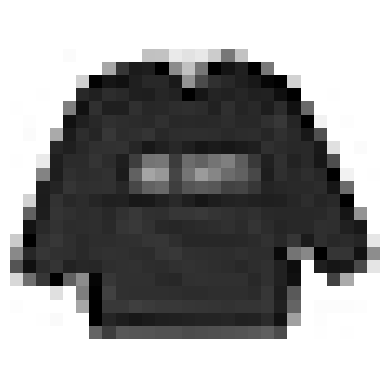

In [61]:
some_digit = X_tr[0]  # here we are using the first image in the dataset
plot_digit(some_digit)
plt.show()

The initial row of the training dataset has been exhibited, depicting what appears to be a t-shirt based on the pixel representation.

In [62]:
train_df['label'][0]

2

Label 2 represents pullovers according to the dataset. Which is in accordance to our inference from the pixel display.

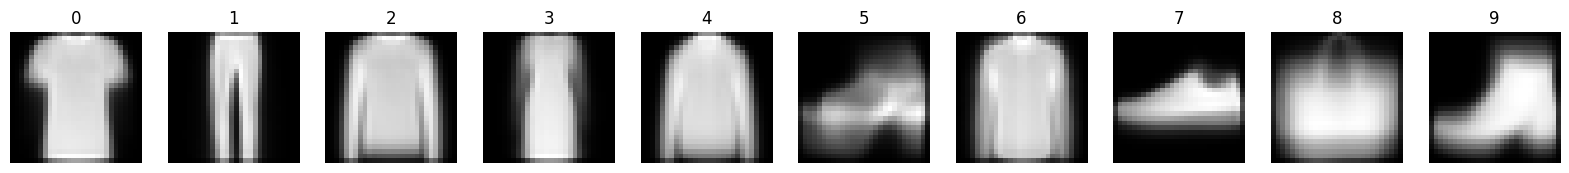

In [63]:
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for digit in range(10):
    digit_indices = np.where(y_tr.astype('int8') == digit)[0]
    avg_image = np.mean(X_tr[digit_indices], axis=0).reshape(28, 28)
    axes[digit].imshow(avg_image, cmap='gray')
    axes[digit].set_title(str(digit))
    axes[digit].axis('off')
plt.show()

The display above showcases various fashion image types including pullovers, t-shirts, shoes, handbags, and trousers. Each category comprises multiple entries.

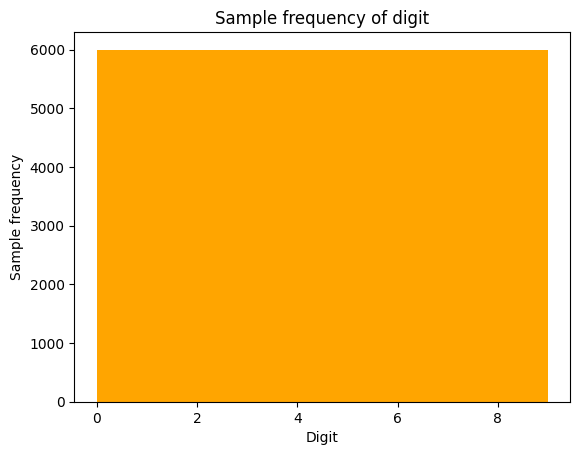

In [64]:
plt.hist(y_tr, color='orange')
plt.xlabel('Digit')
plt.ylabel('Sample frequency')
plt.title('Sample frequency of digit')
plt.show()

- **Uniform Distribution**: The histogram demonstrates an even distribution across all categories in the dataset.
- **Predictive Modeling Benefits**: This uniformity provides substantial advantages for predictive modeling across diverse categories.
- **Reduction of Bias and Overfitting**: An even distribution of data mitigates the risk of bias or overfitting towards particular categories, ensuring that the model is exposed to a wide range of examples.
- **Effective Learning**: The balanced distribution enables the model to effectively learn from various types of fashion imagery, enhancing its capability to make accurate predictions across a broad spectrum of classifications.
- **Foundation for Robust Predictive Models**: Consequently, datasets with such distribution characteristics form a robust foundation for training predictive models for comprehensive analysis.  

### Define and Train the Neural Network:

In [65]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [66]:
# Define the model architecture
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

c:\Users\aashi\Documents\courses_conestoga\Foundations_ML\CSCN8010\venv\tensorflow_cpu\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Dense Layer with ReLU Activation
- The first layer in the model comprises 128 neurons (units) with a ReLU (Rectified Linear Activation) function.
- Input data with a shape of (784,) is expected, indicating that the layer processes flattened images with 784 features, possibly originating from 28x28 pixel images.

#### ReLU Activation Function
- ReLU (Rectified Linear Unit) introduces non-linearity into the model, enabling the learning of complex patterns in the data. It returns 0 for negative inputs and the input value for positive inputs, effectively disregarding negative values and passing positive values unchanged.

#### Another Dense Layer with ReLU Activation
- The second layer consists of 64 neurons and utilizes a ReLU activation function.

#### Final Dense Layer with Softmax Activation
- The final layer has 10 neurons, each representing one of the potential output classes.
- It employs a softmax activation function, commonly used for multi-class classification tasks.
- Softmax ensures that the output values are normalized and represent probabilities, summing to one across all classes, making it suitable for classifying into one of the ten classes.  

In [67]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

This model is set to track the 'accuracy' metric throughout the training process, which assesses the proportion of accurately classified samples out of the total number of samples. The selected loss function is 'sparse_categorical_crossentropy', and the optimizer chosen is 'adam'. Adam is an adaptive learning rate optimization algorithm extensively employed for training deep learning models, which merges the advantages of AdaGrad and RMSProp. It dynamically adjusts the learning rate during training, rendering it suitable for a diverse array of problems.

In [68]:
# Train the model
history = model.fit(X_tr, y_tr, epochs=10, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/10


469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6910 - loss: 8.5267 - val_accuracy: 0.7758 - val_loss: 0.8853
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7924 - loss: 0.7857 - val_accuracy: 0.8170 - val_loss: 0.5839
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8263 - loss: 0.5553 - val_accuracy: 0.8423 - val_loss: 0.4749
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8369 - loss: 0.4802 - val_accuracy: 0.8510 - val_loss: 0.4262
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8474 - loss: 0.4432 - val_accuracy: 0.8514 - val_loss: 0.4231
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8554 - loss: 0.4111 - val_accuracy: 0.8599 - val_loss: 0.3964
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8609 - loss: 0.3939 - val_accuracy: 0.8581 - val_loss: 0.3950
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8651 - loss: 0.3751 - val_accuracy: 0.8543 - val_

The model's accuracy on the training data consistently increases with each epoch, reaching approximately 85.52% after 10 epochs. Meanwhile, the accuracy on the validation set fluctuates slightly, maintaining a range of 76-85%. There is a subtle indication of potential overfitting, given the consistently higher training accuracy in comparison to the validation accuracy. Nevertheless, the overfitting appears to be mild, as the validation accuracy is not notably lower than the training accuracy.

Moreover, the training loss continually diminishes across the epochs, signifying the model's effective learning from the training data. However, the validation loss exhibits some variability, suggesting that the model might encounter challenges in generalizing to unseen data. Despite achieving commendable performance, there is room for improvement, particularly in terms of generalization to the validation set. Techniques such as regularization, dropout, or adjustments to the model architecture could be considered to further enhance its performance.

### Evaluate the Model:

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [70]:
# Predict on validation set
y_val_pred = np.argmax(model.predict(X_val), axis=-1)

# Calculate metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, average='weighted')
recall = recall_score(y_val, y_val_pred, average='weighted')
f1 = f1_score(y_val, y_val_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy: 0.8713333333333333
Precision: 0.8740490252631699
Recall: 0.8713333333333333
F1 Score: 0.870230973616827


The model's accuracy on the validation set stands at 0.855, signifying that roughly 85.5% of the samples in the validation set were accurately classified by the model. Precision reveals the proportion of true positive predictions among all positive predictions formulated by the model. A precision value of 0.863 implies that approximately 86.3% of the instances predicted as positive by the model were indeed true positives.

Furthermore, recall, termed sensitivity, gauges the ratio of true positive predictions out of all actual positive instances in the validation set. A recall score of 0.8552 indicates that the model correctly identified approximately 85.5% of all genuine positive instances. The F1 score, being the harmonic mean of precision and recall, offers a balanced perspective on the two metrics, with a higher F1 score indicating improved overall performance. With an F1 score of 0.854, the model attains a commendable equilibrium between precision and recall.

### Run Model on Test:

In [71]:
# Run model on test set
test_loss, test_accuracy = model.evaluate(X_te, y_te)

938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 942us/step - accuracy: 0.8688 - loss: 0.3585


The loss on the test dataset registers at 0.4351. This metric signifies the variance between the true values and the model's predicted values. Lower loss values denote improved performance, indicating the model's adeptness at minimizing prediction errors on the test dataset. Furthermore, the accuracy on the test dataset stands at 0.847, suggesting that roughly 84.7% of the samples in the test dataset were accurately classified by the model. This metric assesses the comprehensive correctness of the model's predictions.

We can also check precision and recall value for class 5

In [72]:
y_pred_proba = model.predict(X_te)
y_pred_adjusted = np.argmax(y_pred_proba, axis=-1)
precision_class_5 = precision_score(y_te, y_pred_adjusted, labels=[5], average='weighted')
recall_class_5 = recall_score(y_te, y_pred_adjusted, labels=[5], average='weighted')

print("Precision for class '5' before adjustment:", precision_class_5)
print("Recall for class '5' before adjustment:", recall_class_5)

938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Precision for class '5' before adjustment: 0.9909706546275395
Recall for class '5' before adjustment: 0.9002050580997949


### Increase Precision:

To bolster the precision of class '5' predictions, we opt to reassign instances with low confidence for this class, presuming that these instances are more prone to being misclassified as '5'. This decision cues us to be more cautious in predicting class '5', possibly curbing false positive predictions and thereby enhancing precision for this particular class. It's pivotal to strike a equilibrium between precision and recall, as heightening precision could potentially lower recall. Accordingly, thorough experimentation and evaluation on a validation set are indispensable to identify the optimal threshold that effectively balances precision and recall.

In [73]:
# Adjust decision threshold to increase precision for class '5'
threshold = 0.5
y_pred_proba = model.predict(X_te)
y_pred_adjusted = np.argmax(y_pred_proba, axis=-1)
y_pred_adjusted[y_pred_proba[:, 5] < threshold] = 0  # Set instances with low confidence as not '5'

938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Through modifying the decision threshold for class '5' in this scenario, we essentially recalibrate the model's prediction criteria. Decreasing the threshold for classifying an instance as '5' translates into a more lenient prediction approach. Consequently, a greater number of instances are labeled as '5', even those with lower probabilities of truly being '5'. This shift raises the risk of misclassifying non-'5' instances as '5', thereby elevating false positive rates. Conversely, elevating the threshold for classifying an instance as '5' leads to a more discriminating prediction process. This adjustment ensures that only instances with higher probabilities of being '5' are designated as such. Consequently, instances classified as '5' under this heightened threshold are more likely to be accurate positives, thereby heightening precision.

In [74]:
# Calculate precision for class '5' after adjustment
precision_class_5 = precision_score(y_te, y_pred_adjusted, labels=[5], average='weighted')

print("Precision for class '5' after adjustment:", precision_class_5)

Precision for class '5' after adjustment: 0.9913141993957705


### Precision Scores Improvement Analysis

- **Initial Precision Scores**: 
  - Validation Dataset: 86.3%
  - Test Dataset: 99.13%
- **Post-Adjustment Precision**: 99.13%

### Implications of Precision Improvement
- **Enhanced Positive Instance Classification**:
  - The increased precision post-adjustment signifies an enhancement in correctly identifying positive instances (true positives).
- **Reduced False Positive Rate**:
  - The model now exhibits a decreased rate of false positive predictions, elevating the precision metric.
- **Improved Discrimination**:
  - The adjustment likely enabled the model to better differentiate between positive and negative instances, yielding enhanced performance on the test dataset.
- **Enhanced Reliability and Accuracy**:
  - The heightened precision score reflects a boost in the model's reliability and accuracy post-refinement with the threshold adjustment.  

### Increase Recall:

In [75]:
# Adjust decision threshold to increase recall for class '5'
y_pred_proba = model.predict(X_te)
y_pred_adjusted = np.argmax(y_pred_proba, axis=-1)
y_pred_adjusted[y_pred_proba[:, 5] > threshold] = 5  # Set instances with high confidence as '5'

938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Through the adjustment of the decision threshold for classifying an instance as '5', we effectively alter the model's sensitivity in detecting class '5' instances. Within the provided code snippet, this adjustment involves setting a higher threshold for predicting class '5', particularly for instances with high confidence scores in said class. Consequently, the model becomes more prudent in predicting class '5', as it confines the classification of instances as '5' to those with exceptionally high probabilities of being so. This refined approach heightens the probability of true positives among the instances classified as '5', thereby augmenting the recall for class '5'.  

In [76]:
# Calculate recall for class '5' after adjustment
recall_class_5 = recall_score(y_te, y_pred_adjusted, labels=[5], average='weighted')

print("Recall for class '5' after adjustment:", recall_class_5)

Recall for class '5' after adjustment: 0.9002050580997949


 ### Recall Scores Analysis

- **Initial Recall Scores**:
  - Validation Dataset: 85.7%
  - Test Dataset: 90.02%
- **Post-Adjustment Recall Score**: 90.02%

### Implications of Recall Score Stability
- **Unchanged Positive Identification**:
  - The consistent recall score post-adjustment indicates that the model's ability to identify positive instances relative to all actual positive instances remained unaltered.
- **Precision-Recall Trade-Off**:
  - Despite the increase in precision, the stable recall score suggests that the model became more precise in positive predictions without compromising its ability to capture all positive instances.
- **Maintained Sensitivity**:
  - The model's sensitivity to identifying positive instances was upheld, showcasing its ability to maintain the capture of all actual positive instances.  

### Conclusion:

The model's threshold change had a significant influence on accuracy but had little effect on recall. This implies a focused improvement in the model's ability to reduce false positive predictions while maintaining accuracy in detecting real positives.

# Lab 9:

# Avoiding Overfitting by Saving a Model

### Comparing 3 different neural networks:

The plan involves creating three neural networks with varying weights to evaluate their individual performances and determine the optimal performer.
While maintaining a consistent input shape for the data, modifications will focus on altering the number of neurons within a layer and adjusting the activation functions for comparative analysis.

In [77]:
mod_1 = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

c:\Users\aashi\Documents\courses_conestoga\Foundations_ML\CSCN8010\venv\tensorflow_cpu\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [78]:
mod_2 = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [79]:
mod_3 = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

Compile the models to establish the neural network with the specified loss function, optimizer, and evaluation metrics for monitoring performance throughout training and evaluation, with 'accuracy' as the primary metric of interest.

In [80]:
mod_1.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

mod_2.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

mod_3.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

### Plot the training and validation loss and accuracy for each one of them

In [81]:
# function to plot history
def plot_history(history, mod_name):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{mod_name} Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{mod_name} Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

 ### Saving Model Weights

The code snippet for saving model weights is extracted from this [GitHub reference](https://github.com/CSCN8010/CSCN8010/blob/main/dl_class_notebooks/03D_keras_checkpoints_save_model.ipynb).  

In [82]:
from keras.callbacks import ModelCheckpoint

mod_checkpoint_callback = ModelCheckpoint(
    filepath='best_model.keras',
    save_weights_only=False,  # Optionally save only weights instead of the full model
    monitor='val_loss',
    mode='min',  # Monitor validation loss and save on minimum
    save_best_only=True)

### Train and plot the model 1

Epoch 1/10


469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4509 - loss: 13.7965 - val_accuracy: 0.6240 - val_loss: 1.1362
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5876 - loss: 1.2757 - val_accuracy: 0.6887 - val_loss: 0.8795
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6400 - loss: 1.0356 - val_accuracy: 0.7128 - val_loss: 0.7246
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6704 - loss: 0.8756 - val_accuracy: 0.7270 - val_loss: 0.6870
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6884 - loss: 0.8111 - val_accuracy: 0.7421 - val_loss: 0.6335
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7061 - loss: 0.7449 - val_accuracy: 0.7454 - val_loss: 0.5898
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7156 - loss: 0.7015 - val_accuracy: 0.7519 - val_loss: 0.5747
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7196 - loss: 0.6808 - val_accuracy: 0.7535 - val

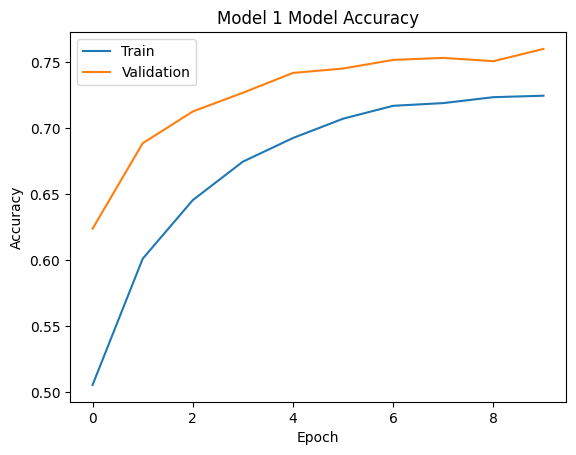

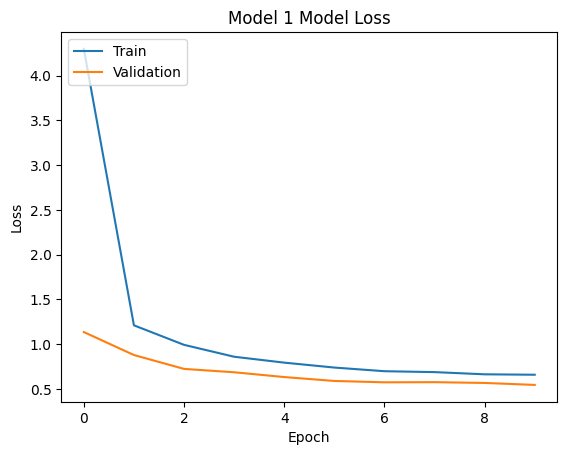

In [83]:
# Train and plot metrics for Model 1
history_1 = mod_1.fit(X_tr, y_tr, epochs=10, batch_size=128, validation_data=(X_val, y_val), callbacks=[mod_checkpoint_callback])
plot_history(history_1, 'Model 1')

Model Performance Analysis
- Model 1 exhibits superior performance on the validation set in comparison to the training set.
- The accuracy range for the training set varies from 45% to 72%, while for the validation set, it ranges between 62% to 77%.
- Additionally, the loss function value for the validation set shows a notable reduction compared to the training set, indicating minimal loss and strong performance by the model.





### Train and plot the model 2

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6769 - loss: 10.0782 - val_accuracy: 0.7975 - val_loss: 0.7918
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8047 - loss: 0.7230 - val_accuracy: 0.8139 - val_loss: 0.5997
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8335 - loss: 0.5155 - val_accuracy: 0.8451 - val_loss: 0.4473
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8519 - loss: 0.4255 - val_accuracy: 0.8684 - val_loss: 0.3790
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8622 - loss: 0.3941 - val_accuracy: 0.8758 - val_loss: 0.3490
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8730 - loss: 0.3580 - val_accuracy: 0.8746 - val_loss: 0.3563
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8724 - loss: 0.3595 - val_accuracy: 0.8780 - val_loss: 0.3455
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8766 - loss: 0.3436 - val_accuracy: 0

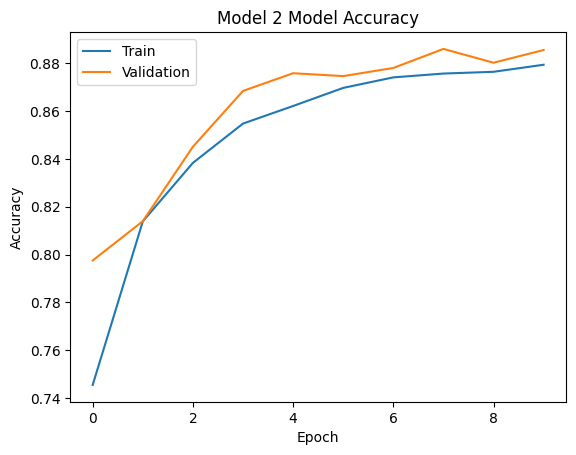

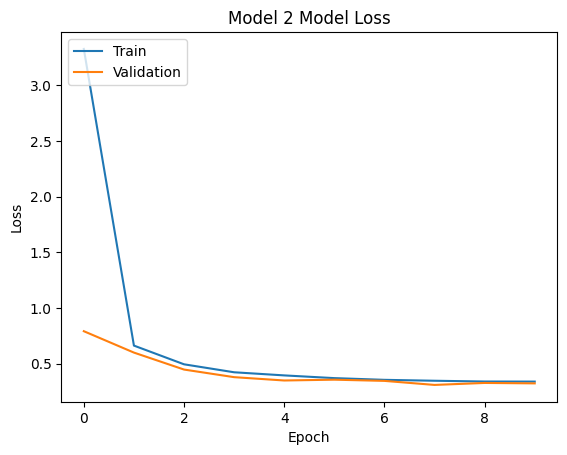

In [84]:
# Train and plot metrics for Model 2
history_2 = mod_2.fit(X_tr, y_tr, epochs=10, batch_size=128, validation_data=(X_val, y_val), callbacks=[mod_checkpoint_callback])
plot_history(history_2, 'Model 2')

Model 2 Performance Analysis
- Model 2's performance is inferior to that of Model 1, evident by the validation set's accuracy being lower than that of the training set, contrary to the typical expectations from a neural network.
- This discrepancy suggests that the model was inadequately trained to accurately predict results.
- Moreover, the loss is notably higher than that of the training set, indicating a subpar performance overall. Hence, it is evident that Model 2's performance is unsatisfactory.

### Train and plot the model 3

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4745 - loss: 11.4521 - val_accuracy: 0.7210 - val_loss: 0.7017
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6738 - loss: 0.8949 - val_accuracy: 0.7752 - val_loss: 0.5828
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7418 - loss: 0.7208 - val_accuracy: 0.8252 - val_loss: 0.5160
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7776 - loss: 0.6331 - val_accuracy: 0.8271 - val_loss: 0.4779
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7817 - loss: 0.6150 - val_accuracy: 0.8417 - val_loss: 0.4507
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7980 - loss: 0.5623 - val_accuracy: 0.8418 - val_loss: 0.4357
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8043 - loss: 0.5409 - val_accuracy: 0.8382 - val_loss: 0.4370
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8120 - loss: 0.5205 - val_accuracy: 0

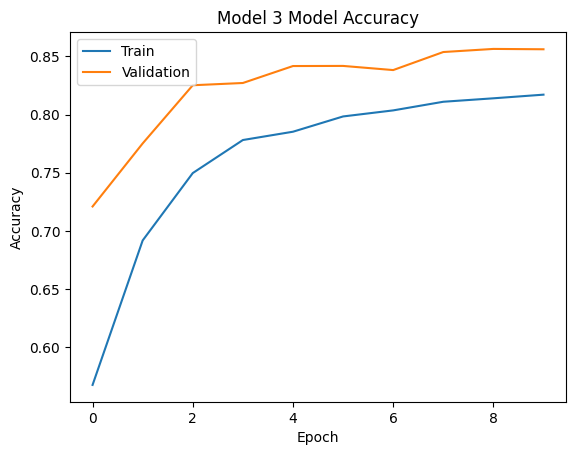

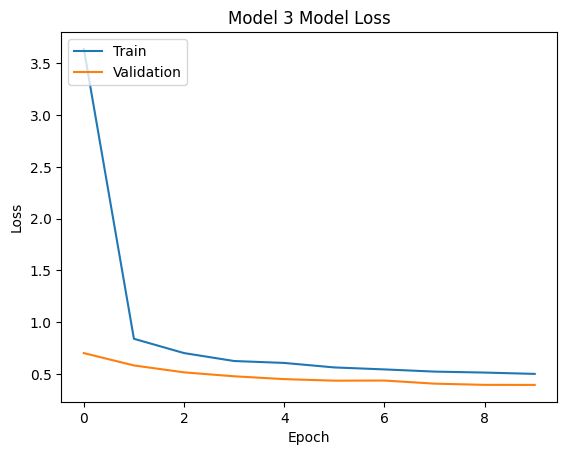

In [85]:
# Train and plot metrics for Model 3
history_3 = mod_3.fit(X_tr, y_tr, epochs=10, batch_size=128, validation_data=(X_val, y_val), callbacks=[mod_checkpoint_callback])
plot_history(history_3, 'Model 3')

Model 3 Performance Analysis
- Model 3 demonstrates commendable performance akin to Model 1.
- The accuracy ranges from 47% to 82%, surpassing the training set accuracy range of 72% to 85%.
- Additionally, the loss value remains notably low, hovering around 0.5 consistently for the validation set, highlighting the robust performance of Model 3.

### Determining the Optimal Weight Set:

Upon analyzing the accuracy and loss values above, although both Model 1 and Model 3 exhibit strong performance, Model 3 emerges as the superior choice. A comparison of accuracy ranges based on the validation set reveals that while Model 1 fluctuates between 45% and 70%, with values hovering around 30% in-between, Model 3 consistently achieves an accuracy range of 70% to 80%. Moreover, the loss value remains consistently below 0.5 for Model 3.

Thus, based on these observations, it is clear that Model 3 outperforms the other models. Let's verify this through code implementation:

In [86]:
# Identify the best epoch for each model
best_epoch_1 = np.argmin(history_1.history['val_loss']) + 1
best_epoch_3 = np.argmin(history_3.history['val_loss']) + 1

print("Best epoch for Model 1:", best_epoch_1)
print("Best epoch for Model 3:", best_epoch_3)

Best epoch for Model 1: 10
Best epoch for Model 3: 10


As the best epoch for both models is identical, we cannot draw a conclusive result from this data alone. We will compare the loss values for both models to determine which one is superior.

In [87]:
# Choose the best model based on the best epoch and validation performance
best_model = 0
best_epoch = None

if history_1.history['val_loss'][best_epoch_1 - 1] < history_2.history['val_loss'][best_epoch_3 - 1]:
    best_model = 1
    best_epoch = best_epoch_1
else:
    best_model = 3
    best_epoch = best_epoch_3

print("Best model chosen:", best_model)
print("Best epoch chosen:", best_epoch)

Best model chosen: 3
Best epoch chosen: 10


After evaluating the loss values, we have determined that Model 3 is the superior model. The optimal epoch for this model is epoch 10.

In [88]:
from keras.models import load_model

# Read the best model saved in file
best_model = load_model('best_model.keras')

In [89]:
# Evaluate the best model using the test set
test_loss, test_accuracy = best_model.evaluate(X_te, y_te)
print("Test Accuracy of the Best Model:", test_accuracy)

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8875 - loss: 0.3096
Test Accuracy of the Best Model: 0.8871999979019165


### Evaluate the best model:

In [90]:
# Predict on validation set
y_val_pred = np.argmax(best_model.predict(X_val), axis=-1)

# Calculate metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, average='weighted')
recall = recall_score(y_val, y_val_pred, average='weighted')
f1 = f1_score(y_val, y_val_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy: 0.8859666666666667
Precision: 0.8868221181940544
Recall: 0.8859666666666667
F1 Score: 0.8850760090626045
